For different z's, plot how avgvel shifts as epochs increase.

In [61]:
import numpy as np
import glob
import csv
import os

sample_z_cnt = 9 # [0.1, 0.5, 0.9]; or 5 if use [0.1, 0.3, 0.5, 0.7, 0.9]
# use [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

total_runs = 3
this_run_info = [f'0523_0201_take2', f'0523_0201_take3', f'0523_0201_take4']

total_eps = 60
start_eps = 4
stepsize = 8

avgvel_dir = []
for i in range(total_runs):
    this_avgvel_dir = f'test/all_avgvel_ade_fde/{this_run_info[i]}'
    avgvel_dir.append(this_avgvel_dir)


ade_all = np.zeros((total_runs, sample_z_cnt, total_eps//stepsize+1))
fde_all = np.zeros((total_runs, sample_z_cnt, total_eps//stepsize+1))
avgvel_all = np.zeros((total_runs, sample_z_cnt, total_eps//stepsize+1))

In [62]:
for j in range(total_runs):
    for i in range(start_eps, total_eps+1, stepsize):
        cp_num = str(i)
        this_csv_file = f'{avgvel_dir[j]}/{cp_num}.csv'
        all_this_epoch = np.genfromtxt(this_csv_file, delimiter=',')
        ade_all[j, :, i//stepsize] = all_this_epoch[:,0]
        fde_all[j, :, i//stepsize] = all_this_epoch[:,1]
        avgvel_all[j, :, i//stepsize] = all_this_epoch[:,2]

In [63]:

mean_avgvel = np.mean(avgvel_all, axis=0)
var_avgvel = np.var(avgvel_all, axis=0)

# print(avgvel_all.shape)
# print(mean_avgvel[0,7])
print(var_avgvel)

mean_ade = np.mean(ade_all, axis=0)
var_ade = np.var(ade_all, axis=0)

mean_fde = np.mean(fde_all, axis=0)
var_fde = np.var(fde_all, axis=0)


[[7.38182679e-06 7.94765402e-04 1.66970719e-04 2.43662551e-04
  1.25765719e-04 2.51056258e-05 3.81183669e-05 2.00687878e-05]
 [4.74485419e-05 5.16271735e-04 8.26112367e-04 3.39101138e-04
  1.19357458e-04 3.44082074e-05 6.69081499e-05 1.18310930e-05]
 [1.14610236e-04 7.99352050e-05 3.90902964e-04 1.66023219e-04
  6.45542376e-05 5.25113409e-05 5.05111301e-05 1.16298802e-05]
 [7.84880884e-05 5.80142439e-06 1.33453552e-05 8.28512522e-06
  4.94415533e-06 9.45014249e-06 5.15474073e-06 7.98360636e-06]
 [4.46633749e-05 9.35880154e-07 5.01379640e-06 2.15481031e-07
  2.05890882e-07 9.93274223e-07 4.07464045e-07 9.50625721e-07]
 [2.38263013e-05 3.52564051e-07 7.84466786e-06 5.70631610e-08
  6.92987468e-08 5.53557401e-07 2.46372600e-07 7.31051108e-07]
 [1.08109362e-05 1.27276527e-07 1.22993259e-05 6.38865812e-08
  2.80895084e-09 1.34452737e-07 1.01911657e-07 4.72925193e-07]
 [3.86289768e-06 5.11995759e-08 1.52338465e-05 7.16010410e-08
  3.49595995e-08 2.06078119e-08 3.75260227e-08 3.41282864e-07]


(8,)


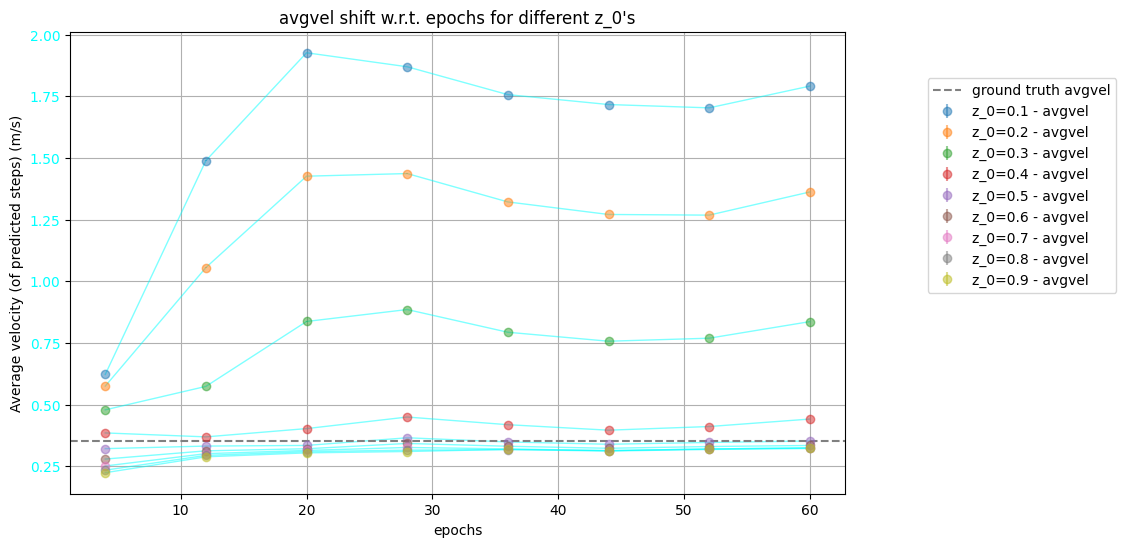

In [64]:
import matplotlib.pyplot as plt

x = np.arange(start_eps, total_eps+1, stepsize)
print(x.shape)

colors = plt.cm.tab10(range(sample_z_cnt))

# ax1.errorbar(x, mean_ade, yerr=var_ade, fmt='o', color='purple', alpha=0.5, label='ADE with error bars')

# ax1.set_ylabel('ADE (m)', color='purple')
# ax1.tick_params(axis='y',labelcolor='purple')

fig, ax2 = plt.subplots(figsize=(10,6))
ax2.set_xlabel('epochs')
ax2.grid(True)
for i in range(sample_z_cnt):
    z = round(0.1 + i*0.1, 1)  # Round z to 1 decimal place
    # ax2.scatter(x, avgvel_all[i,:],marker='s',s=50,c=colors[i],alpha=0.5,label=f'z_0={z} - avgvel')
    ax2.errorbar(x, mean_avgvel[i,:], yerr=var_avgvel[i,:], fmt='o', color=colors[i], alpha=0.5, label=f'z_0={z} - avgvel')
    ax2.plot(x, mean_avgvel[i,:],color='cyan',alpha=0.5, linestyle='-', linewidth=1)

ax2.set_ylabel('Average velocity (of predicted steps) (m/s)')
ax2.tick_params(axis='y',labelcolor='cyan')

# ax2.axhline(y=-0.4528, color='grey', linestyle='--', label='ground truth avgvel')
ax2.axhline(y=0.3525, color='grey', linestyle='--', label='ground truth avgvel')


# lines1, labels1 = ax1.get_legend_handles_labels()
# lines1, labels1 = None, None
lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines1+lines2, labels1+labels2, bbox_to_anchor=(1.35,0.9), borderaxespad=0.)
ax2.legend(lines2, labels2, bbox_to_anchor=(1.35,0.9), borderaxespad=0.)


plt.title("avgvel shift w.r.t. epochs for different z_0's")
plt.show()


# for i in range(sample_z_cnt):
#     z = round(0.1 + i*0.1, 1)  # Round z to 1 decimal place
#     ax1.scatter(x, ade_all[i,:],s=50,c=colors[i],alpha=0.5,label=f'z_0={z} - FDE')
#     ax1.plot(x, ade_all[i,:],color='red',alpha=0.5, linestyle='-', linewidth=1)

#################################################################################33

# ax1.set_xlabel('epochs')
# ax1.set_ylabel('ADE (m)', color='purple')
# ax1.tick_params(axis='y',labelcolor='purple')
# ax1.grid(True)

# ax2 = ax1.twinx()

# for i in range(sample_z_cnt):
    
#     z = round(0.1 + i*0.1, 1)  # Round z to 1 decimal place
#     ax2.scatter(x, avgvel_all[i,:],marker='s',s=50,c=colors[i],alpha=0.5,label=f'z_0={z} - avgvel')
#     ax2.plot(x, avgvel_all[i,:],color='cyan',alpha=0.5, linestyle='-', linewidth=1)

# ax2.set_ylabel('Average velocity (of predicted steps) (m/s)', color='cyan')
# ax2.tick_params(axis='y',labelcolor='cyan')

# ax2.axhline(y=0.3525, color='grey', linestyle='--', label='ground truth avgvel')

# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines1+lines2, labels1+labels2, bbox_to_anchor=(1.35,0.9), borderaxespad=0.)

# plt.title("ADE/avgvel shift w.r.t. epochs for different z_0's")
# plt.show()